In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.table import Table
from glob import glob
import matplotlib.pyplot as plt
import scipy
from math import lgamma
import seaborn as sns
%matplotlib inline

path = '/Users/chris/Desktop/mastrangelo/'

In [2]:
import matplotlib.pylab as pylab
pylab_params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(pylab_params)

total_stars = 67380

In [3]:
from ast import literal_eval

#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass

Read in files. For each recovery DataFrame per model, calculate the geometric and detected transit multiplicity. For each model, plot the 30 recovery multiplicities over the single ground truth one. There should be one plus (three times two times three) models, or 19 different models. Which models have greater spread? Let's find out!

In [4]:
truth = pd.read_csv(path+'collect_ground_truth.csv', converters=dict(transit_multiplicities=literal_eval))
truth

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs
0,-2.0,0.0,1.000000e+08,0.1,"[206.20000000000002, 10.100000000000001, 0.0, ...","[425.8, 39.1, 0.0, 0.0, 0.0, 0.0]",-902.059614,0.000000,0.1
1,-2.0,0.0,1.000000e+08,0.2,"[412.40000000000003, 20.200000000000003, 0.0, ...","[851.6, 78.2, 0.0, 0.0, 0.0, 0.0]",-448.086290,0.000000,0.2
2,-2.0,0.0,1.000000e+08,0.3,"[618.6000000000001, 30.300000000000004, 0.0, 0...","[1277.4, 117.30000000000001, 0.0, 0.0, 0.0, 0.0]",-272.301531,0.000000,0.3
3,-2.0,0.0,1.000000e+08,0.4,"[824.8000000000001, 40.400000000000006, 0.0, 0...","[1703.2, 156.4, 0.0, 0.0, 0.0, 0.0]",-210.412966,0.000000,0.4
4,-2.0,0.0,1.000000e+08,0.5,"[1031.0, 50.5, 0.0, 0.0, 0.0, 0.0]","[2129.0, 195.5, 0.0, 0.0, 0.0, 0.0]",-210.933152,0.000000,0.5
...,...,...,...,...,...,...,...,...,...
725,0.0,1.0,1.000000e+10,0.6,"[1473.6, 687.6, 330.59999999999997, 122.399999...","[1588.2, 1080.0, 790.8, 506.4, 262.2, 57.0]",-827.859436,0.599995,0.0
726,0.0,1.0,1.000000e+10,0.7,"[1719.1999999999998, 802.1999999999999, 385.7,...","[1852.8999999999999, 1260.0, 922.5999999999999...",-1112.654990,0.699994,0.0
727,0.0,1.0,1.000000e+10,0.8,"[1964.8000000000002, 916.8000000000001, 440.8,...","[2117.6, 1440.0, 1054.4, 675.2, 349.6, 76.0]",-1418.585312,0.799994,0.0
728,0.0,1.0,1.000000e+10,0.9,"[2210.4, 1031.4, 495.90000000000003, 183.6, 59...","[2382.3, 1620.0, 1186.2, 759.6, 393.3, 85.5]",-1740.657701,0.899993,0.0


In [5]:
recovery = pd.read_csv(path+'collect_recovery.csv', converters=dict(transit_multiplicities=literal_eval))
recovery

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs
0,-2.0,0.0,1.000000e+08,0.1,"[205.0, 12.100000000000001, 0.0, 0.0, 0.0, 0.0]","[425.6, 39.300000000000004, 0.0, 0.0, 0.0, 0.0]",-883.511711,0.0,0.1
1,-2.0,0.0,1.000000e+08,0.2,"[410.0, 24.200000000000003, 0.0, 0.0, 0.0, 0.0]","[851.2, 78.60000000000001, 0.0, 0.0, 0.0, 0.0]",-430.338388,0.0,0.2
2,-2.0,0.0,1.000000e+08,0.3,"[615.0000000000001, 36.300000000000004, 0.0, 0...","[1276.8000000000002, 117.90000000000002, 0.0, ...",-255.353628,0.0,0.3
3,-2.0,0.0,1.000000e+08,0.4,"[820.0, 48.400000000000006, 0.0, 0.0, 0.0, 0.0]","[1702.4, 157.20000000000002, 0.0, 0.0, 0.0, 0.0]",-194.265064,0.0,0.4
4,-2.0,0.0,1.000000e+08,0.5,"[1025.0, 60.5, 0.0, 0.0, 0.0, 0.0]","[2128.0, 196.5, 0.0, 0.0, 0.0, 0.0]",-195.585250,0.0,0.5
...,...,...,...,...,...,...,...,...,...
21605,0.0,1.0,1.000000e+10,1.0,"[2419.0, 1180.0, 588.0, 212.0, 71.0, 9.0]","[2682.0, 1832.0, 1290.0, 920.0, 453.0, 90.0]",-2131.778373,1.0,0.0
21606,0.0,1.0,1.000000e+10,1.0,"[2360.0, 1180.0, 561.0, 252.0, 52.0, 9.0]","[2615.0, 1777.0, 1309.0, 928.0, 425.0, 94.0]",-2088.098087,1.0,0.0
21607,0.0,1.0,1.000000e+10,1.0,"[2367.0, 1196.0, 601.0, 254.0, 66.0, 7.0]","[2565.0, 1810.0, 1298.0, 941.0, 423.0, 87.0]",-2156.898394,1.0,0.0
21608,0.0,1.0,1.000000e+10,1.0,"[2348.0, 1241.0, 536.0, 228.0, 65.0, 14.0]","[2631.0, 1784.0, 1341.0, 883.0, 446.0, 95.0]",-2105.708305,1.0,0.0


Build zero bins for both DataFrames

In [6]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(truth.transit_multiplicities[:]):
    zero_bins.append(total_stars-np.sum(i))
    temp = truth.reset_index().transit_multiplicities[:][j]
    temp.insert(0,total_stars - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
truth['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(recovery.transit_multiplicities[:]):
    zero_bins.append(total_stars-np.sum(i))
    temp = recovery.reset_index().transit_multiplicities[:][j]
    temp.insert(0,total_stars - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
recovery['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

Pad transit multiplicities with zeros so they're all the same length.

In [7]:
def pad(lam):
    lam += [0.] * (7 - len(lam)) # pad with zeros to match length of k
    return lam

truth['transit_multiplicities'] = truth.transit_multiplicities.apply(pad)
recovery['transit_multiplicities'] = recovery.transit_multiplicities.apply(pad)


#### See if injection-recovery works for a single model

m = -1, b = 0.5, c = 1e9, f = 0.3

In [8]:
tm = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities

tm_recovery = recovery.loc[(recovery.ms == -1) & (recovery.bs == 0.5) & (recovery.cs == 1e9) & (np.round(recovery.fs,1) == 0.3)].transit_multiplicities.to_list()

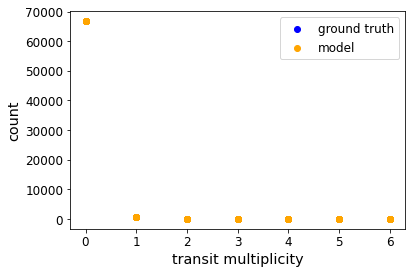

In [9]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(np.arange(len(np.sum(tm))), np.sum(tm), label='ground truth', color='blue')
plt.scatter(np.arange(len(tm_recovery[0])), tm_recovery[0], label='model', color='orange')

for i in tm_recovery[1:]:
    plt.scatter(np.arange(len(i)), i, color='orange')

plt.ylabel('count')
plt.xlabel('transit multiplicity')
#plt.xlim([-0.5,6])
plt.legend()
plt.show()

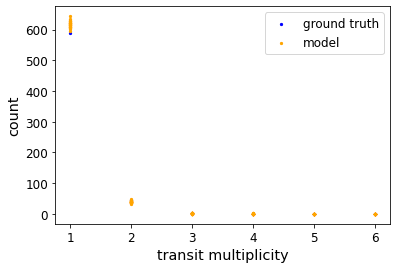

In [10]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(np.arange(len(np.sum(tm)))[1:], np.sum(tm)[1:], label='ground truth', color='blue', s=5)
plt.scatter(np.arange(len(tm_recovery[0]))[1:], tm_recovery[0][1:], label='model', color='orange', s=5)

for i in tm_recovery[1:]:
    plt.scatter(np.arange(len(i))[1:], i[1:], color='orange', s=5)

plt.ylabel('count')
plt.xlabel('transit multiplicity')
#plt.xlim([-0.5,6])
plt.legend()
plt.show()

Ok, so whether or not I include the zero-bin, our injection-recovery envelopes the ground truth, at least for the middling fiducial model I chose. Now how about for all of them?

In [33]:
def prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c):
    """
    Each model run will use an evenly spaced (m,b, cutoff) tuple on a discrete 11x11x11 3D grid
    We're doing log(time), so slope is sampled linearly (everything gets logged together later)
    If a cutoff results in a zero probability, don't bother 

    gi_m: grid index on m axis
    gi_b: grid index on b axis
    gi_c: grid index for cutoff time axis
    """
    #cube[0] = -1e-9*np.logspace(8,10,11)[gi_m] # convert from year to Gyr
    cube[0] = np.linspace(-2,0,3)[gi_m] 
    cube[1] = np.linspace(0,1,3)[gi_b]
    #cube[2] = np.logspace(1e8,1e10,11)
    cube[2] = np.round(np.logspace(8,10,11)[gi_c], 0) # in Ballard et al in prep, they use log(yrs) instead of drawing yrs from logspace
    return cube

In [ ]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3
for gi_m in range(3):

    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(11):
            #print(gi_m, gi_b, gi_c) # so I know where I am
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)

            for f in fs:
                #recovery_min = []
                #recovery_max = []
                #recovery_avg = []
                #print(cube)
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (np.round(truth.cs, 0) == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (np.round(recovery.cs, 0) == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # take min/max envelopes and avg for tm_recovery
                for i in range(len(np.sum(tm))):
                    fail = False
                    #recovery_min.append(np.amin(np.take(tm_recovery, indices=i, axis=1)))
                    #recovery_max.append(np.amax(np.take(tm_recovery, indices=i, axis=1)))
                    #recovery_avg.append(np.mean(np.take(tm_recovery, indices=i, axis=1)))

                    # flag whenever a model's ground truth is not successfully recovered
                    min_elt = np.amin(np.take(tm_recovery, indices=i, axis=1))
                    max_elt = np.amax(np.take(tm_recovery, indices=i, axis=1))
                    avg_elt = np.mean(np.take(tm_recovery, indices=i, axis=1))
                    
                    if (np.sum(tm)[i] <= max_elt) and (np.sum(tm)[i] >= min_elt):
                        continue
                    else:
                        fail = True
                        #print(cube, f)
                        #print(min_elt, np.sum(tm)[i], max_elt)
                        
                if fail == True:
                    print(cube, f, min_elt, np.sum(tm)[i], max_elt, tm_recovery, i,
                         np.amin(np.take(tm_recovery, indices=i, axis=1)),
                         np.amax(np.take(tm_recovery, indices=i, axis=1)),
                         np.mean(np.take(tm_recovery, indices=i, axis=1)))
                    asdfa
                    
                #print(recovery_min)
                #print(np.sum(tm))
                #afdf

Seems like all models match. But to pass the injection-recovery test, the marginalized posterior must show that the favored model is the original ground truth model.

### Posteriors

#### Fiducial model

In [17]:
tm_fiducial = truth.loc[(np.round(truth.ms, 1) == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities

tm_recovery = recovery.loc[(recovery.ms == -1) & (recovery.bs == 0.5) & (recovery.cs == 1e9) & (np.round(recovery.fs,1) == 0.3)].transit_multiplicities.to_list()

In [22]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """

    # in the rare occasion that a simulated system has 7+ planets, throw them into the 6+ bin
    if len(k) < len(lam): 
        extras = lam[len(k):]
        sum_extras = np.sum(extras)
        lam[5] += sum_extras
    lam = lam[:6]
    
    logL = []
    for i in range(len(lam)):
        if lam[i]==0:
            term3 = -lgamma(k[i]+1)
            term2 = -lam[i]
            term1 = 0
            logL.append(term1+term2+term3)

        else:
            term3 = -lgamma(k[i]+1)
            term2 = -lam[i]
            term1 = k[i]*np.log(lam[i])
            logL.append(term1+term2+term3)

    return np.sum(logL)

better_loglike(tm_recovery[0], np.sum(tm))

-19.80135823632404

In [46]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3

ms = []
bs = []
cs = []
fs_for_df = []
all_logLs = []

for gi_m in range(3):
    
    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(11):
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
            
            for f in fs:
                
                ms.append(cube[0])
                bs.append(cube[1])
                cs.append(cube[2])
                fs_for_df.append(f)
                
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (np.round(truth.cs, 0) == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (np.round(recovery.cs, 0) == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # calculate logL for each realization of each model, using tm as the ground truth
                logLs = []
                for i in range(len(tm_recovery)):
                    logL = better_loglike(tm_recovery[i], np.sum(tm_fiducial))
                    logLs.append(logL)
                
                # get best logL for each model
                best_logL = np.max(logLs)
                    
                all_logLs.append(best_logL)
                

In [47]:
model_logLs = pd.DataFrame({'m': ms, 'b': bs, 'c': cs, 'f': fs_for_df, 'logL': all_logLs})
model_logLs

,m,b,c,f,logL
0,-2.0,0.5,1.000000e+08,0.1,-246.029389
1,-2.0,0.5,1.000000e+08,0.1,-246.029389
2,-2.0,0.5,1.000000e+08,0.1,-246.029389
3,-2.0,0.5,1.000000e+08,0.2,-132.552072
4,-2.0,0.5,1.000000e+08,0.2,-132.552072
...,...,...,...,...,...
3295,0.0,1.0,1.000000e+10,0.9,-2467.495664
3296,0.0,1.0,1.000000e+10,0.9,-2467.495664
3297,0.0,1.0,1.000000e+10,1.0,-2860.027559
3298,0.0,1.0,1.000000e+10,1.0,-2860.027559


In [139]:
truth.cs.unique()

array([1.00000000e+08, 1.58489319e+08, 2.51188643e+08, 3.98107171e+08,
       6.30957344e+08, 1.00000000e+09, 1.58489319e+09, 2.51188643e+09,
       3.98107171e+09, 6.30957344e+09, 1.00000000e+10])

[-603561.5948414556, -675303.3075248096, -1120593.679552332]


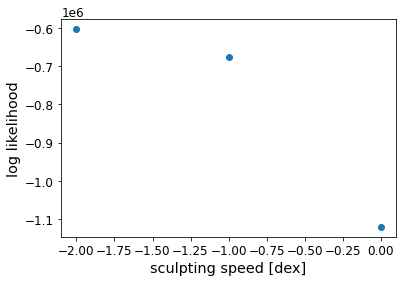

In [162]:
# marginalize in 1D
marginalized_logLs = []
for gi_m in range(3):

    cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
    
    # subset
    only = model_logLs.loc[(model_logLs.m == cube[0])]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.sum(only.logL))
print(marginalized_logLs)

plt.scatter(truth.ms.unique(), marginalized_logLs)
plt.ylabel("log likelihood")
plt.xlabel("sculpting speed [dex]")
plt.show()

In [189]:
model_logLs.loc[np.round(model_logLs.m, 1) == -2].groupby(['c','b']).mean('logL').reset_index().logL.sum()

-12071.231896829113

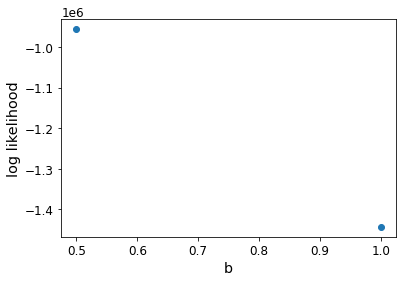

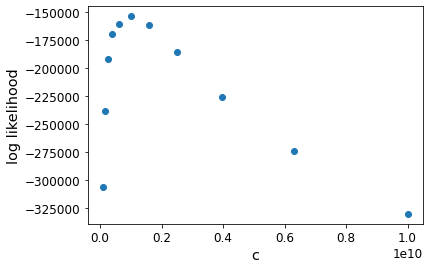

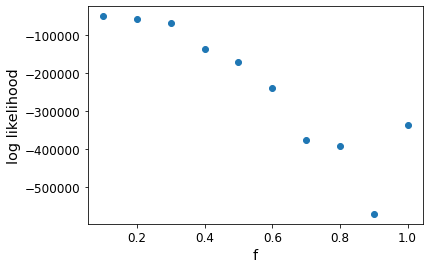

In [184]:
marginalized_logLs = []
for gi_b in range(2):
    gi_b = gi_b + 1
    
    cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
    
    # subset
    only = model_logLs.loc[(model_logLs.b == cube[1])]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.sum(only.logL))
plt.scatter(model_logLs.b.unique(), marginalized_logLs)
plt.ylabel("log likelihood")
plt.xlabel("b")
plt.show()

marginalized_logLs = []
for gi_c in range(11):

    cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
    
    # subset
    only = model_logLs.loc[(model_logLs.c == cube[2])]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.sum(only.logL))
plt.scatter(truth.cs.unique(), marginalized_logLs)
plt.ylabel("log likelihood")
plt.xlabel("c")
plt.show()

marginalized_logLs = []
for gi_f in np.linspace(0.1, 1, 10):
    
    # subset
    only = model_logLs.loc[(np.round(model_logLs.f, 1) == np.round(gi_f, 1))]
    
    # marginalize logL
    marginalized_logLs.append(np.sum(only.logL))
plt.scatter(np.linspace(0.1, 1, 10), marginalized_logLs)
plt.ylabel("log likelihood")
plt.xlabel("f")
plt.show()

In [185]:
model_logLs.loc[np.round(model_logLs.f, 1) == 0.3].groupby(['m','b']).mean('logL').reset_index()

,m,b,c,f,logL
0,-2.0,0.5,2.447833e+09,0.3,-107.570495
1,-2.0,1.0,2.447833e+09,0.3,-157.832629
2,-1.0,0.5,2.447833e+09,0.3,-116.264477
3,-1.0,1.0,2.447833e+09,0.3,-200.238558
4,0.0,0.5,2.447833e+09,0.3,-204.082142
5,0.0,1.0,2.447833e+09,0.3,-471.146723


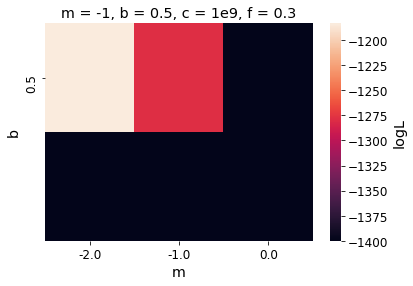

In [54]:
piv = model_logLs.loc[model_logLs.f == 0.3].groupby(['m','b','c']).mean('logL').reset_index().groupby(['m','b']).sum('logL').reset_index()

piv = piv.pivot("b","m","logL") # vs logged_normalized_likelihood
#print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
#print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

fig, ax = plt.subplots()
sns.heatmap(piv, yticklabels=model_logLs.b.unique().round(1), cbar_kws={'label': 'logL'}, vmin=-1400)
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.title('m = -1, b = 0.5, c = 1e9, f = 0.3')
plt.show()

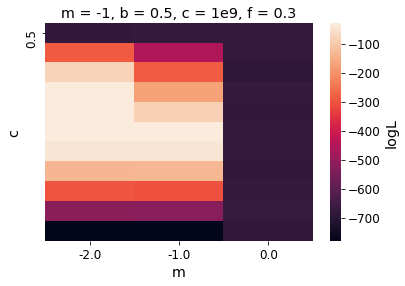

In [147]:
piv = model_logLs.loc[model_logLs.f == 0.3].groupby(['m','b','c']).mean('logL').reset_index().groupby(['m','c']).sum('logL').reset_index()

piv = piv.pivot("c","m","logL") # vs logged_normalized_likelihood
#print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
#print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

fig, ax = plt.subplots()
sns.heatmap(piv, yticklabels=model_logLs.b.unique().round(1), cbar_kws={'label': 'logL'})
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.title('m = -1, b = 0.5, c = 1e9, f = 0.3')
plt.show()

#### Check 1D marginalized posteriors, and finish this for full set of m and b. Then do this for a few other models. 

There are the following degeneracies: when the ground truth is moderate sculpting, we favor moderate sculpting, as well as 1) moderate longevity and initial intact fraction but fast sculpting; and, to a lesser extent, 2) no sculpting and moderate initial intact fraction. How can that be? I guess there are so few stars younger than 1 Gyr that calling it moderate is a bit disingenous. Perhaps I should try another slice of model space, close to 4 or 5 Gyrs. 

#### Now, for all models

In [ ]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3

ms = []
bs = []
cs = []
fs_for_df = []
all_logLs = []

for gi_m in range(3):
    
    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(3):
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
            
            for f in fs:
                
                ms.append(cube[0])
                bs.append(cube[1])
                cs.append(cube[2])
                fs_for_df.append(f)
                
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (truth.cs == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (recovery.cs == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # calculate logL for each realization of each model, using tm as the ground truth
                logLs = []
                for i in range(len(tm_recovery)):
                    logL = better_loglike(tm_recovery[i], np.sum(tm_fiducial))
                    logLs.append(logL)
                
                # get best logL for each model
                best_logL = np.amax(logLs)
                all_logLs.append(best_logL)
                

### Quick, fiducial plots for ERES slides

Show example difference in observed transit multiplicity yields for intact vs disrupted systems

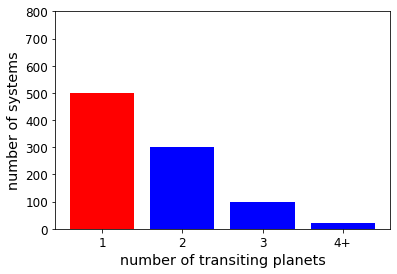

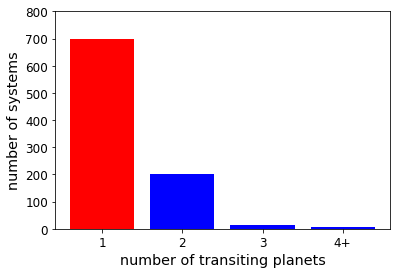

In [90]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#bar_eres = pd.DataFrame({'transits': ['0', '1', '2', '3+']}) # for the x axis label
bar_eres = pd.DataFrame({'transits': ['1', '2', '3', '4+']}) # for the x axis label
c = ['red', 'blue', 'blue', 'blue'] # bar colors

plt.bar(bar_eres.transits, [500, 300, 100, 20], color=c)
plt.xlabel('number of transiting planets')
plt.ylabel('number of systems')
plt.ylim([0, 800])
#plt.savefig(path+'figures/intact.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

c = ['red', 'blue', 'blue', 'blue'] # bar colors
plt.bar(bar_eres.transits, [700, 200, 15, 5], color=c)
plt.xlabel('number of transiting planets')
plt.ylabel('number of systems')
plt.ylim([0, 800])
#plt.savefig(path+'figures/disrupted.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

Plot Figure 4, Yang+ 2022 from http://www.lamost.org/publications/upload/2022/Yang%20Jiayi-AJ(2022).pdf

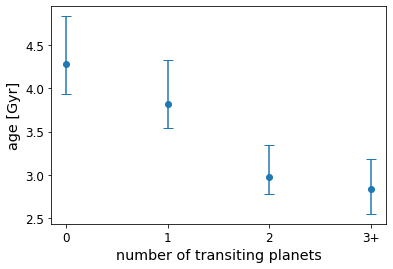

In [156]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

chen_comparison = pd.DataFrame({'multi': ['0', '1', '2', '3+'], 
                               'age': [4.28, 3.82, 2.98, 2.84],
                               'err1': [0.55, 0.5, 0.36, 0.34],
                               'err2': [0.35, 0.28, 0.2, 0.29]})

#plt.errorbar([1], [np.median(ones.iso_age)], yerr=[[-np.median(ones.iso_age_err2)], [np.median(ones.iso_age_err1)]], fmt='o')
plt.errorbar(chen_comparison.multi, chen_comparison.age, yerr=[chen_comparison.err2, chen_comparison.err1],
            fmt='o', capsize=5)

plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
plt.savefig(path+'figures/past-ii.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

Do any sculpting laws produce distributions that match the PAST data?

In [148]:
me_vs_past = pd.read_csv(path+'past_ii_recovery.csv', sep=',')
me_vs_past

,ms,bs,cs,fs,nontransit_age_maxes,nontransit_age_mins,ones_age_maxes,ones_age_mins,twos_age_maxes,twos_age_mins,threes_age_maxes,threes_age_mins
0,-2.0,0.0,1.000000e+08,0.1,5.903495,1.760284,5.817271,1.772852,5.492887,1.658351,NaN,NaN
1,-2.0,0.0,1.000000e+08,0.2,5.903301,1.760487,5.821405,1.763301,5.402262,1.629167,NaN,NaN
2,-2.0,0.0,1.000000e+08,0.3,5.902648,1.760186,5.807636,1.767149,5.805735,1.788088,NaN,NaN
3,-2.0,0.0,1.000000e+08,0.4,5.901691,1.760346,5.869113,1.761241,5.777778,1.717556,NaN,NaN
4,-2.0,0.0,1.000000e+08,0.5,5.901868,1.760148,5.863256,1.791568,5.425161,1.499355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21605,0.0,1.0,1.000000e+10,1.0,5.908368,1.762983,NaN,NaN,NaN,NaN,NaN,NaN
21606,0.0,1.0,1.000000e+10,1.0,5.907817,1.762882,NaN,NaN,NaN,NaN,NaN,NaN
21607,0.0,1.0,1.000000e+10,1.0,5.905314,1.761853,NaN,NaN,NaN,NaN,NaN,NaN
21608,0.0,1.0,1.000000e+10,1.0,5.908594,1.762937,NaN,NaN,NaN,NaN,NaN,NaN


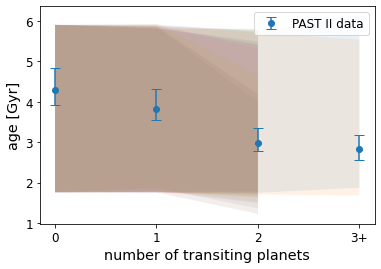

In [160]:
for row, j in enumerate(me_vs_past):
    plt.fill_between(['0', '1', '2', '3+'], [me_vs_past['nontransit_age_maxes'][row], 
                                            me_vs_past['ones_age_maxes'][row],
                                            me_vs_past['twos_age_maxes'][row],
                                            me_vs_past['threes_age_maxes'][row]], 
                     [me_vs_past['nontransit_age_mins'][row], me_vs_past['ones_age_mins'][row],
                      me_vs_past['twos_age_mins'][row], me_vs_past['threes_age_mins'][row]],
                    alpha=0.1)
plt.errorbar(chen_comparison.multi, chen_comparison.age, yerr=[chen_comparison.err2, chen_comparison.err1],
        fmt='o', capsize=5, label='PAST II data')
    
plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
plt.legend()
plt.show()

In [216]:
tm = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities
tm

82    [66724.5, 609.6000000000001, 42.30000000000000...
Name: transit_multiplicities, dtype: object

In [217]:
truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)]

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs,transit_multiplicity_zero_bin
82,-1.0,0.5,1.000000e+09,0.3,"[66724.5, 609.6000000000001, 42.30000000000000...","[1263.6000000000001, 129.00000000000003, 8.400...",-224.004177,0.01881,0.28119,"[66724.5, 609.6000000000001, 42.30000000000000..."


In [222]:
df = pd.read_csv(path+'systems/transits0_1_0.csv', sep=',')
df

/Users/chris/anaconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,kepid,iso_teff,iso_teff_err1,iso_teff_err2,feh_x,feh_err1,feh_err2,iso_age,iso_age_err1,...,incl,mutual_incl,ecc,omega,lambda_ks,second_terms,geom_transit_status,transit_status,prob_detections,sn
0,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.205712,0.003269,0.079433,5.328677,8.484696e+47,0.003165,0.0,0.0,0.0,0.0
1,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.236934,0.034490,0.109648,1.111269,6.127440e+47,0.006621,0.0,0.0,0.0,0.0
2,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.324149,0.121706,0.173780,5.676972,1.122792e+48,0.022500,0.0,0.0,0.0,0.0
3,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.190797,-0.011646,0.144544,3.499886,4.680497e+47,0.010569,0.0,0.0,0.0,0.0
4,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.206182,0.003739,0.114815,1.152918,1.010308e+48,0.006620,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243268,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.190046,0.050542,0.012023,4.015136,9.518226e+47,0.001349,0.0,0.0,0.0,0.0
243269,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.177185,0.037681,0.054954,1.144401,1.306789e+48,0.002220,0.0,0.0,0.0,0.0
243270,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.129590,-0.009914,0.173780,4.143923,8.797263e+47,0.015264,0.0,0.0,0.0,0.0
243271,69295,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.213230,-0.184346,0.301995,5.843744,1.108083e+48,0.062843,0.0,0.0,0.0,0.0


#### Test new code for collect2() to compare age vs multiplicity

In [117]:
test = pd.read_csv(path+'systems/transits0_2_0.csv', sep=',', error_bad_lines=False)
test

b'Skipping line 12591: expected 31 fields, saw 55\nSkipping line 12593: expected 31 fields, saw 61\nSkipping line 25145: expected 31 fields, saw 47\nSkipping line 25154: expected 31 fields, saw 49\n'
b'Skipping line 37707: expected 31 fields, saw 33\nSkipping line 37734: expected 31 fields, saw 53\nSkipping line 50274: expected 31 fields, saw 56\nSkipping line 50304: expected 31 fields, saw 42\nSkipping line 62823: expected 31 fields, saw 56\nSkipping line 62860: expected 31 fields, saw 32\n'
b'Skipping line 75358: expected 31 fields, saw 54\nSkipping line 75391: expected 31 fields, saw 44\nSkipping line 87884: expected 31 fields, saw 33\nSkipping line 87919: expected 31 fields, saw 56\n'
b'Skipping line 100413: expected 31 fields, saw 51\nSkipping line 100446: expected 31 fields, saw 52\nSkipping line 112934: expected 31 fields, saw 52\nSkipping line 112972: expected 31 fields, saw 47\nSkipping line 125462: expected 31 fields, saw 44\nSkipping line 125504: expected 31 fields, saw 55\n

,Unnamed: 0,kepid,iso_teff,iso_teff_err1,iso_teff_err2,feh_x,feh_err1,feh_err2,iso_age,iso_age_err1,...,incl,mutual_incl,ecc,omega,lambda_ks,second_terms,geom_transit_status,transit_status,prob_detections,sn
0,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.105355,-0.082448,0.063096,5.782578,7.734131e+47,0.005383,0.0,0.0,0.000000,0.000000
1,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.089435,-0.066528,0.072444,1.155976,9.751910e+47,0.004834,0.0,0.0,0.000000,0.000000
2,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.077447,-0.054540,0.151356,3.565841,1.157779e+48,0.012991,0.0,0.0,0.000000,0.000000
3,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.003431,0.019476,0.151356,1.225999,4.378531e+47,0.011708,1.0,1.0,0.777231,13.772309
4,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.033172,0.056079,0.125893,4.028600,1.675932e+48,0.009516,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381235,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.386297,0.087010,0.120226,4.838540,2.593060e+47,0.011009,0.0,0.0,0.000000,0.000000
381236,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.362660,0.063374,0.016596,5.752006,4.606963e+47,0.002145,0.0,0.0,0.000000,0.000000
381237,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.256287,-0.043000,0.165959,3.358178,1.272227e+48,0.014779,0.0,0.0,0.000000,0.000000
381238,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.268487,-0.030799,0.041687,5.995001,3.064590e+47,0.001343,0.0,0.0,0.000000,0.000000


In [118]:
transit = test.loc[test['transit_status']==1]
# create column counting number of planets per system
transit['yield'] = 1
transit = transit.groupby(['kepid', 'iso_age', 'iso_age_err1', 'iso_age_err2'])[['yield']].count().reset_index()
print(transit)

           kepid iso_age  iso_age_err1  iso_age_err2  yield
0       757280.0    1.24          0.20         -0.16      1
1       892195.0   14.31          3.50         -4.61      2
2      1026356.0    7.29          3.69         -3.40      1
3      1027030.0    3.48          1.63         -0.64      1
4      1161092.0    2.73          0.98         -0.77      2
...          ...     ...           ...           ...    ...
4525  12785311.0    5.77          2.63         -2.24      1
4526  12833453.0   10.61          4.98         -4.66      4
4527  12833566.0    1.54          0.30         -0.24      1
4528  12833827.0    7.55          2.82         -1.49      1
4529  12834217.0    2.65          0.97         -0.74      1

[4530 rows x 5 columns]


/Users/chris/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
ones = transit.loc[transit['yield'] == 1]
ones_age_mean = np.mean(ones.iso_age.astype(float))
ones_age_std = np.mean(0.5 * (ones.iso_age_err1 + np.abs(ones.iso_age_err2)))

print(ones_age_mean, ones_age_std)

5.825223642172518 1.700209664536741


In [119]:
nontransit = test.loc[test['transit_status']==0]
print(len(nontransit), len(transit)) # before f is applied
print(transit.head())

samples_indices = transit.sample(frac=0.5, replace=False).index 
transit.loc[samples_indices, 'transit_status'] = 0
#nontransit = test.loc[test['transit_status']==0]
print(len(transit)) # after f is applied
print(transit.head())


373396 4530
       kepid iso_age  iso_age_err1  iso_age_err2  yield
0   757280.0    1.24          0.20         -0.16      1
1   892195.0   14.31          3.50         -4.61      2
2  1026356.0    7.29          3.69         -3.40      1
3  1027030.0    3.48          1.63         -0.64      1
4  1161092.0    2.73          0.98         -0.77      2
4530
       kepid iso_age  iso_age_err1  iso_age_err2  yield  transit_status
0   757280.0    1.24          0.20         -0.16      1             0.0
1   892195.0   14.31          3.50         -4.61      2             NaN
2  1026356.0    7.29          3.69         -3.40      1             0.0
3  1027030.0    3.48          1.63         -0.64      1             NaN
4  1161092.0    2.73          0.98         -0.77      2             0.0


In [121]:
print(len(transit.loc[transit.transit_status!=0]))

2265


In [122]:
rejects = transit.loc[transit.transit_status==0]
print(len(nontransit), len(rejects))
nontransit = pd.concat([nontransit, rejects])
print(len(nontransit))

373396 2265
375661


In [126]:
transit['yield']

0       1
1       2
2       1
3       1
4       2
       ..
4525    1
4526    4
4527    1
4528    1
4529    1
Name: yield, Length: 4530, dtype: int64

In [127]:
zeros_age_std = np.mean(0.5 * (nontransit.iso_age_err1 + np.abs(nontransit.iso_age_err2)))

In [138]:
np.mean(0.5 * (np.array(nontransit.iso_age_err1) + np.abs(np.array(nontransit.iso_age_err2))))

1.7622592976114102

In [136]:
np.array(nontransit.iso_age_err2)

array([-0.16, -0.16, -0.16, ..., -0.24, -1.49, -0.74])

In [137]:
zeros_age_std

1.7622592976113838